<h1><marquee> <div style="text-align: center" ><b> <font color="red"> HR <font color="blue">ANALYTICS</div>
    
***

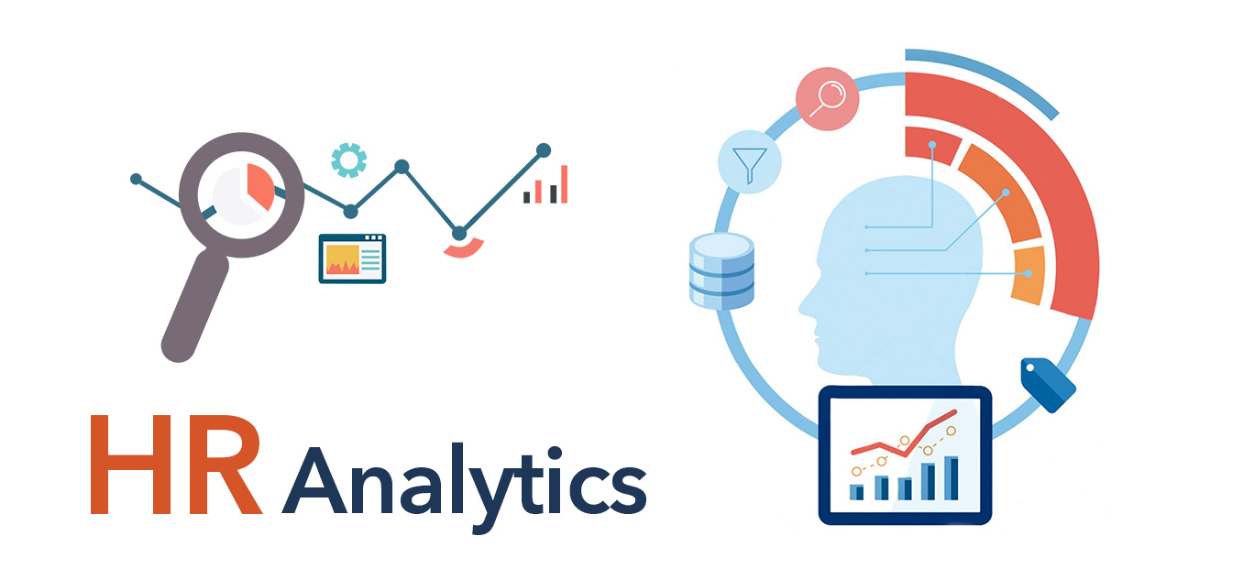

<div style="text-align: center" ><b> <font color="red">HR Data Analysis </div>

<div style="text-align: center"> while HR departments are generating data of tremendous volumes, variety, and veracity, every Human Resource the department is being questioned as to how they measure the talent. Tune here to learn about HR Analytics and its application <font color="red"><b>HR Data analysis for Predicting the Acceptance offer latter</b></font> I am going to share how I work with a dataset step by step  <b>from data preparation and data analysis to statistical tests and implementing Logistic regression machine learning models.</b> I will also describe the model results along with many other tips. Let's get started.</div>

## <font color ='blue'>**HR Analysis: EDA to ML Logistic Regression**  

* EDA with Pandas and Seaborn
* apply the Logistic Regression models of sklearn
* Identifying Probabilities Values
* Finding Significant features.
* Identifying Threshold point
* Statistical Evalution
* Construct Decision tree for Stratigies
* Hyperparameter tuning

# Part 0 : Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import warnings
warnings.filterwarnings('ignore')

**Reading Dataset**

In [3]:
df = pd.read_csv('./HR_data.csv')

# Part 1: Exploratory Data Analysis

## 1.1 Overview of features

- How many rows and columns are there?  
- What are the names of the features (columns)?  
- Which features are numerical, which are categorical?
- droping unimportant features?
- How many values are missing?  
- The **shape** and **info** methods answer these questions  
- **head** displays some rows of the dataset  
- **describe** gives a summary of the statistics (only for numerical columns)

### shape, info, head and describe

In [4]:
df.shape

(8995, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 18 columns):
SLNO                           8995 non-null int64
Candidate.Ref                  8995 non-null int64
DOJ.Extended                   8995 non-null object
Duration.to.accept.offer       8995 non-null int64
Notice.period                  8995 non-null int64
Offered.band                   8995 non-null object
Pecent.hike.expected.in.CTC    8995 non-null float64
Percent.hike.offered.in.CTC    8995 non-null float64
Percent.difference.CTC         8995 non-null float64
Joining.Bonus                  8995 non-null object
Candidate.relocate.actual      8995 non-null object
Gender                         8995 non-null object
Candidate.Source               8995 non-null object
Rex.in.Yrs                     8995 non-null int64
LOB                            8995 non-null object
Location                       8995 non-null object
Age                            8995 non-null int64
Status      

In [6]:
df.head()

SLNO  Candidate.Ref DOJ.Extended  Duration.to.accept.offer  Notice.period  \
0     1        2110407          Yes                        14             30   
1     2        2112635           No                        18             30   
2     3        2112838           No                         3             45   
3     4        2115021           No                        26             30   
4     5        2115125          Yes                         1            120   

  Offered.band  Pecent.hike.expected.in.CTC  Percent.hike.offered.in.CTC  \
0           E2                       -20.79                        13.16   
1           E2                        50.00                       320.00   
2           E2                        42.84                        42.84   
3           E2                        42.84                        42.84   
4           E2                        42.59                        42.59   

   Percent.difference.CTC Joining.Bonus Candidate.relocate.actual  Gender  \
0                   42.86            No                        No  Female   
1                  180.00            No                        No    Male   
2                    0.00            No                        No    Male   
3                    0.00            No                        No    Male   
4                    0.00            No                       Yes    Male   

    Candidate.Source  Rex.in.Yrs    LOB Location  Age  Status  
0             Agency           7    ERS    Noida   34  Joined  
1  Employee Referral           8  INFRA  Chennai   34  Joined  
2             Agency           4  INFRA    Noida   27  Joined  
3  Employee Referral           4  INFRA    Noida   34  Joined  
4  Employee Referral           6  INFRA    Noida   34  Joined

In [7]:
df.describe()

SLNO  Candidate.Ref  Duration.to.accept.offer  Notice.period  \
count   8995.000000   8.995000e+03               8995.000000    8995.000000   
mean    5970.984325   2.843647e+06                 21.434464      39.291829   
std     3373.963454   4.863448e+05                 25.811616      22.220239   
min        1.000000   2.109586e+06                  0.000000       0.000000   
25%     3207.500000   2.386476e+06                  3.000000      30.000000   
50%     5976.000000   2.807482e+06                 10.000000      30.000000   
75%     8739.000000   3.300060e+06                 33.000000      60.000000   
max    12333.000000   3.836076e+06                224.000000     120.000000   

       Pecent.hike.expected.in.CTC  Percent.hike.offered.in.CTC  \
count                  8995.000000                  8995.000000   
mean                     43.864804                    40.657356   
std                      29.788975                    36.064060   
min                     -68.830000                   -60.530000   
25%                      27.270000                    22.090000   
50%                      40.000000                    36.000000   
75%                      53.850000                    50.000000   
max                     359.770000                   471.430000   

       Percent.difference.CTC   Rex.in.Yrs          Age  
count             8995.000000  8995.000000  8995.000000  
mean                -1.573802     4.239022    29.913174  
std                 19.610729     2.547571     4.097912  
min                -67.270000     0.000000    20.000000  
25%                 -8.330000     3.000000    27.000000  
50%                  0.000000     4.000000    29.000000  
75%                  0.000000     6.000000    34.000000  
max                300.000000    24.000000    60.000000

- The SINO is usefull for all data so, Drop the SINO column

In [8]:
df.drop('SLNO',axis=1,inplace=True)

In [9]:
print(df['Status'].value_counts())

Joined        7313
Not Joined    1682
Name: Status, dtype: int64


In [10]:
print(df['Status'].value_counts()/len(df))

Joined        0.813007
Not Joined    0.186993
Name: Status, dtype: float64


### Numerical and Categorical features

In [11]:
numerical_feats = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  8
Number of Categorical features:  9


In [12]:
print(df[numerical_feats].columns)
print("*"*100)
print(df[categorical_feats].columns)

Index(['Candidate.Ref', 'Duration.to.accept.offer', 'Notice.period',
       'Pecent.hike.expected.in.CTC', 'Percent.hike.offered.in.CTC',
       'Percent.difference.CTC', 'Rex.in.Yrs', 'Age'],
      dtype='object')
****************************************************************************************************
Index(['DOJ.Extended', 'Offered.band', 'Joining.Bonus',
       'Candidate.relocate.actual', 'Gender', 'Candidate.Source', 'LOB',
       'Location', 'Status'],
      dtype='object')


### List of features with missing values

In [13]:
total = df.isnull().sum().sort_values(ascending=False)
total

Status                         0
Percent.difference.CTC         0
DOJ.Extended                   0
Duration.to.accept.offer       0
Notice.period                  0
Offered.band                   0
Pecent.hike.expected.in.CTC    0
Percent.hike.offered.in.CTC    0
Joining.Bonus                  0
Age                            0
Candidate.relocate.actual      0
Gender                         0
Candidate.Source               0
Rex.in.Yrs                     0
LOB                            0
Location                       0
Candidate.Ref                  0
dtype: int64

**No Missing Values in this Dataset**

### Target Variable Understanding

Joined        0.813007
Not Joined    0.186993
Name: Status, dtype: float64

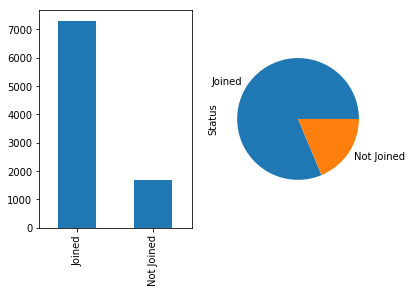

In [14]:
plt.subplot(1,2,1)
df['Status'].value_counts().plot('bar')
plt.subplot(1,2,2)
df['Status'].value_counts().plot('pie')
df['Status'].value_counts()/len(df)

<font color="Balue">**Part-1 Observations**

- dataframe df has 18 columns with id + Target(Status) columns. There is some columns are not imporant for predicting the target column like SINO.
- The SINO is not important for predections and model gives worng prediction.droping the the SINO column
- In this Datset 8 numerical features and 9 categorical features
- There is no null values in the Dataset
- Understanding Target Variable and identiying balanced data or not
- The target variable data is <b>imbalnced <b> 

# Part 2: Creating Dummies

In [169]:
dum_df = pd.get_dummies(df,drop_first=True)
dum_df.head()

Candidate.Ref  Duration.to.accept.offer  Notice.period  \
0        2110407                        14             30   
1        2112635                        18             30   
2        2112838                         3             45   
3        2115021                        26             30   
4        2115125                         1            120   

   Pecent.hike.expected.in.CTC  Percent.hike.offered.in.CTC  \
0                       -20.79                        13.16   
1                        50.00                       320.00   
2                        42.84                        42.84   
3                        42.84                        42.84   
4                        42.59                        42.59   

   Percent.difference.CTC  Rex.in.Yrs  Age  DOJ.Extended_Yes  Offered.band_E1  \
0                   42.86           7   34                 1                0   
1                  180.00           8   34                 0                0   
2                    0.00           4   27                 0                0   
3                    0.00           4   34                 0                0   
4                    0.00           6   34                 1                0   

   ...  Location_Chennai  Location_Cochin  Location_Gurgaon  \
0  ...                 0                0                 0   
1  ...                 1                0                 0   
2  ...                 0                0                 0   
3  ...                 0                0                 0   
4  ...                 0                0                 0   

   Location_Hyderabad  Location_Kolkata  Location_Mumbai  Location_Noida  \
0                   0                 0                0               1   
1                   0                 0                0               0   
2                   0                 0                0               1   
3                   0                 0                0               1   
4                   0                 0                0               1   

   Location_Others  Location_Pune  Status_Not Joined  
0                0              0                  0  
1                0              0                  0  
2                0              0                  0  
3                0              0                  0  
4                0              0                  0  

[5 rows x 36 columns]

In [170]:
dum_df.shape

(8995, 36)

<font color ="balue"> **Part 2: Obsevations**
    
- In statistics, especially in regression models, we deal with various kind of data. The data may be quantitative (numerical) or qualitative (categorical). The numerical data can be easily handled in regression models but we can’t use categorical data directly, it needs to be transformed in some way.


- For transforming categorical attribute to numerical attribute, One hot encoding is used in regression models following label encoding. This enables us to create new attributes according to the number of classes present in the categorical attribute 

# Part 3: Balancing Dataset

- Main effects of imabalnced dataset is model predicts worng information or less accuracy 

### Oversampling
- Synthetic Minority Over-sampling Technique
- Oversampling the data using SMOTE alogorithm 
- It aims to balance class distribution by randomly increasing minority class examples by replicating them.

<font color ="Green">The Oversampling methods work with the minority class. In these methods, we duplicate random instances of the minority class. So, it replicates the observations from minority class to balance the data. It is also known as upsampling. It may result in overfitting due to duplication of data points.
    
- we overcome the data imbalances by generating artificial data. So, it is also a type of oversampling technique.
- there is a powerful and widely used method known as synthetic minority oversampling technique or SMOTE. Under this technique, artificial data is created based on feature space.

In [176]:
# split independent and dependent

X = dum_df.iloc[:,:-1] # independent
y = dum_df.iloc[:,-1] #dependent

In [17]:
import imblearn

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
type(X)
type(y)

pandas.core.series.Series

In [20]:
x_resample,y_resample = SMOTE(k_neighbors=2).fit_resample(X,y)

In [21]:
# saving array
np.savez('HR_oversample.npz',x_resample,y_resample)

In [22]:
# load array data
data_over = np.load('HR_oversample.npz')
data_over.files

['arr_0', 'arr_1']

In [23]:
x_over = data_over['arr_0']
y_over =data_over['arr_1']

In [24]:
x_over.shape

(14626, 35)

In [25]:
y_over.shape

(14626,)

In [26]:
x_over.dtype

dtype('float64')

In [27]:
y_over.dtype

dtype('uint8')

In [28]:
Xd = pd.DataFrame(x_over,columns=X.keys())

In [200]:
Xd.head()

Candidate.Ref  Duration.to.accept.offer  Notice.period  \
0      2110407.0                      14.0           30.0   
1      2112635.0                      18.0           30.0   
2      2112838.0                       3.0           45.0   
3      2115021.0                      26.0           30.0   
4      2115125.0                       1.0          120.0   

   Pecent.hike.expected.in.CTC  Percent.hike.offered.in.CTC  \
0                       -20.79                        13.16   
1                        50.00                       320.00   
2                        42.84                        42.84   
3                        42.84                        42.84   
4                        42.59                        42.59   

   Percent.difference.CTC  Rex.in.Yrs   Age  DOJ.Extended_Yes  \
0                   42.86         7.0  34.0               1.0   
1                  180.00         8.0  34.0               0.0   
2                    0.00         4.0  27.0               0.0   
3                    0.00         4.0  34.0               0.0   
4                    0.00         6.0  34.0               1.0   

   Offered.band_E1  ...  Location_Bangalore  Location_Chennai  \
0              0.0  ...                 0.0               0.0   
1              0.0  ...                 0.0               1.0   
2              0.0  ...                 0.0               0.0   
3              0.0  ...                 0.0               0.0   
4              0.0  ...                 0.0               0.0   

   Location_Cochin  Location_Gurgaon  Location_Hyderabad  Location_Kolkata  \
0              0.0               0.0                 0.0               0.0   
1              0.0               0.0                 0.0               0.0   
2              0.0               0.0                 0.0               0.0   
3              0.0               0.0                 0.0               0.0   
4              0.0               0.0                 0.0               0.0   

   Location_Mumbai  Location_Noida  Location_Others  Location_Pune  
0              0.0             1.0              0.0            0.0  
1              0.0             0.0              0.0            0.0  
2              0.0             1.0              0.0            0.0  
3              0.0             1.0              0.0            0.0  
4              0.0             1.0              0.0            0.0  

[5 rows x 35 columns]

In [201]:
yd = pd.DataFrame(y_over,columns=['Status'])

In [202]:
yd.head()

Status
0       0
1       0
2       0
3       0
4       0

In [203]:
yd.Status.value_counts()

1    7313
0    7313
Name: Status, dtype: int64

<font color="bluea">**part 2 Observations**
- After oversampling the target varibale is balanced
    1 = 7313
    0 = 7313

# Part 3: Multicoliniarity

- <font color='green'>Multicollinearity is a state of very high intercorrelations or inter-associations among the independent variables.
- It is therefore a type of disturbance in the data, and if present in the data the statistical inferences made about the data may not be reliable.
    
**There are certain reasons why multicollinearity occurs:**

- It is caused by an inaccurate use of dummy variables.
- It is caused by the inclusion of a variable which is computed from other variables in the data set.
- Multicollinearity can also result from the repetition of the same kind of variable.
- Generally occurs when the variables are highly correlated to each other.

**Multicollinearity can result in several problems. These problems are as follows:**

- The partial regression coefficient due to multicollinearity may not be estimated precisely. The standard errors are likely to be high.
- Multicollinearity results in a change in the signs as well as in the magnitudes of the partial regression coefficients from one sample to another sample.
- Multicollinearity makes it tedious to assess the relative importance of the independent variables in explaining the variation caused by the dependent variable.

**VIF- Variance Influance Factor**

- Vif is used to identifying the which factor is highly influenced on correlation of data

In [177]:
corr = dum_df.iloc[:,:-1].corr()

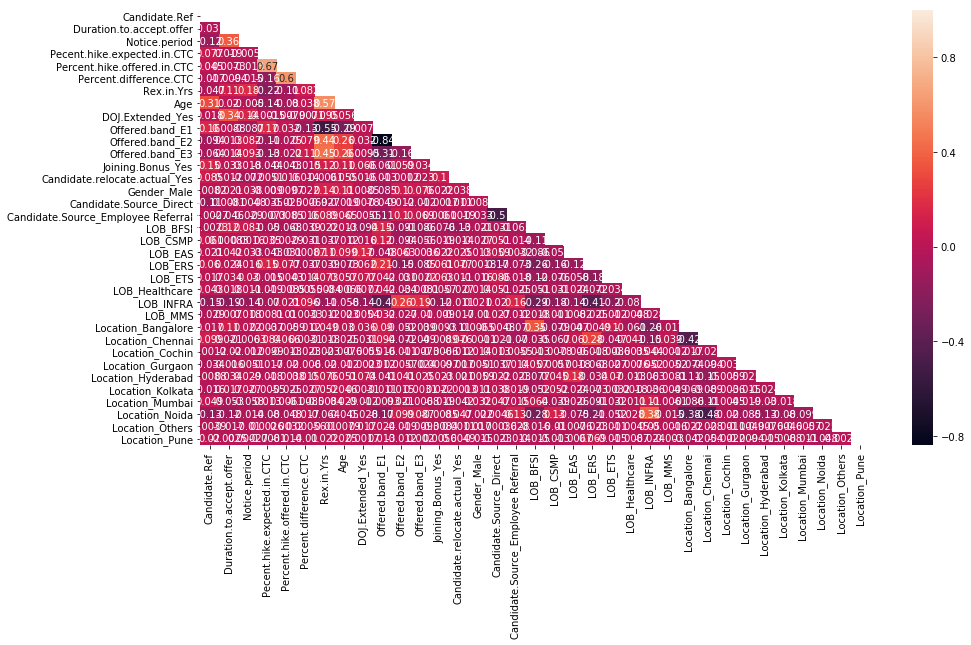

In [178]:
plt.figure(figsize=(15,8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,mask=mask)

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [179]:
# conside numerical data
num_col = dum_df.dtypes[dum_df.dtypes != 'object'].index

X_num=dum_df[num_col]

vif = pd.DataFrame()
vif['features'] = X_num.keys()
vif['VIF_score'] = [variance_inflation_factor(X_num.values,i) for i in range(len(X_num.keys()))]
vif

features  VIF_score
0                        Candidate.Ref  47.282238
1             Duration.to.accept.offer   2.252855
2                        Notice.period   5.269661
3          Pecent.hike.expected.in.CTC  52.947134
4          Percent.hike.offered.in.CTC  57.040741
5               Percent.difference.CTC  14.338714
6                           Rex.in.Yrs  11.962619
7                                  Age  98.360042
8                     DOJ.Extended_Yes   2.296981
9                      Offered.band_E1  32.088305
10                     Offered.band_E2  18.358363
11                     Offered.band_E3   5.298205
12                   Joining.Bonus_Yes   1.151256
13       Candidate.relocate.actual_Yes   1.289398
14                         Gender_Male   6.092137
15             Candidate.Source_Direct   3.214899
16  Candidate.Source_Employee Referral   1.782399
17                            LOB_BFSI   4.182595
18                            LOB_CSMP   2.136190
19                             LOB_EAS   1.747280
20                             LOB_ERS   6.254676
21                             LOB_ETS   2.347041
22                      LOB_Healthcare   1.258132
23                           LOB_INFRA   7.895325
24                             LOB_MMS   1.038923
25                  Location_Bangalore  34.747745
26                    Location_Chennai  49.272999
27                     Location_Cochin   1.138548
28                    Location_Gurgaon   3.232816
29                  Location_Hyderabad   6.114154
30                    Location_Kolkata   2.800956
31                     Location_Mumbai   4.288622
32                      Location_Noida  41.023000
33                     Location_Others   1.227847
34                       Location_Pune   1.769609
35                   Status_Not Joined   1.364804

<font color='bluea'>**Part 3 Observations**
- if the VIF value if > 5 then build to the feature engineering to which is the important and signifinat features/

## Part 4: Train Test Splite

- Below sklearn module is used divide the traing is 70% and Testing 30%

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(Xd,yd,test_size=0.3)

In [37]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((10238, 35), (4388, 35), (10238, 1), (4388, 1))

## <font color="red"> Task - 1

<h3><b><font color='red'>1.Build a logistic Regression model to predict the probability of the candidate joining the company.</b> 

## 4.1 Logistic Regression identifying Probabilities

 **Logistic Regression**
<h2><center> f(x)=$\frac{1}{1+e^{-(ax+b)}}$</h2>
 
- This is a sigmoidal (S-shaped) curved 
- Logistic regression becomes a classification technique only when a decision threshold is brought into the picture.
- The setting of the threshold value is a very important aspect of Logistic regression and is dependent on the classification problem itself.
- It’s a classification algorithm, that is used where the response variable is categorical.
- The idea of Logistic Regression is to find a relationship between features and probability of particular outcome.

This type of a problem is referred to as <b>Binomial Logistic Regression</b>, where the response variable has two values 0 and 1 or pass and fail or true and false. <b>Multinomial Logistic Regression</b> deals with situations where the response variable can have three or more possible values.

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [39]:
model.fit(x_train,y_train)  # traing

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
model.intercept_,model.coef_

(array([-4.80461608e-05]),
 array([[-2.34685788e-07, -8.06202819e-04,  2.14296340e-02,
          8.83188657e-04, -3.53959380e-03, -2.42111859e-03,
          3.61644530e-04, -3.95021312e-03, -2.27570959e-04,
          2.14612655e-05, -3.33976103e-05, -1.08360746e-04,
          1.93710415e-05, -1.05260967e-03, -1.00818515e-05,
         -1.78361216e-04, -5.20611745e-04,  2.14928474e-04,
          3.23363114e-06,  1.14793202e-04,  3.26058456e-04,
         -6.30596335e-05,  6.34375250e-07, -7.17625177e-04,
         -1.42177973e-05,  3.43053738e-04,  3.92957221e-04,
          6.57136503e-07, -9.30210712e-06,  6.74808909e-07,
          3.36150018e-06, -6.27022276e-05, -7.13829222e-04,
         -1.37687179e-05,  9.26581158e-06]]))

In [41]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 1, 1], dtype=uint8)

In [42]:
pred_prob = model.predict_proba(x_test)

In [43]:
pred_prob

array([[0.37246302, 0.62753698],
       [0.5959616 , 0.4040384 ],
       [0.53015102, 0.46984898],
       ...,
       [0.53099193, 0.46900807],
       [0.37984257, 0.62015743],
       [0.47660298, 0.52339702]])

In [44]:
from sklearn import metrics

In [45]:
kappa = metrics.cohen_kappa_score(y_test,y_pred)
kappa

0.2245938772737075

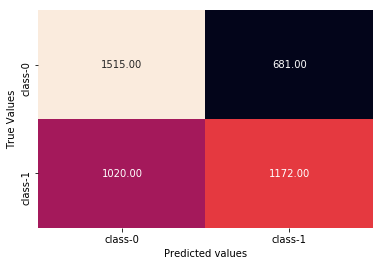

In [46]:
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='0.2f',xticklabels=['class-0','class-1'],yticklabels=['class-0','class-1'],cbar=False)
plt.xlabel('Predicted values')
plt.ylabel('True Values')
plt.show()

In [47]:
report = metrics.classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.60      0.69      0.64      2196
           1       0.63      0.53      0.58      2192

    accuracy                           0.61      4388
   macro avg       0.62      0.61      0.61      4388
weighted avg       0.62      0.61      0.61      4388



<font color="Bluea">**part 4 Observation**
    
- Basic Logistic model to identifying the Probabilities of given data set. i.e probabilite of getting 0(joined) and 1(not joined)
- model coeffiencients are too low. reason for that is variance of the given data high.
- above given accuracy is 61. it not much good model and precision and recall also less.

<h3><b><font color='red'>2.Find the significant features form the above model and build another logistic regression model with only the significant features 

# Part 5: Identifying Significant Features

## 5.1 Feature engineeirng

<font color="green">- Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work.
- If feature engineering is done correctly, it increases the predictive power of machine learning algorithms by creating features from raw data that help facilitate the machine learning process. Feature Engineering is an art.
- Backward elimination method
Backward elimination method is a process of eliminating eliminate the highest p-valued feature.

**Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.**

In [204]:
model_1 = sm.GLM(yd,Xd).fit()
print(model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Status   No. Observations:                14626
Model:                            GLM   Df Residuals:                    14591
Model Family:                Gaussian   Df Model:                           34
Link Function:               identity   Scale:                         0.20253
Method:                          IRLS   Log-Likelihood:                -9058.0
Date:                Tue, 22 Oct 2019   Deviance:                       2955.1
Time:                        23:20:20   Pearson chi2:                 2.96e+03
No. Iterations:                     3   Covariance Type:             nonrobust
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Candidate.Ref                       6.829e-09   9.22e-09      0.741      0.459   -1

In [205]:
print(model_1.pvalues.max())
print(model_1.pvalues.idxmax())

0.916053001670379
Percent.difference.CTC


In [206]:
x1 = Xd.drop('Percent.difference.CTC',axis=1)

In [208]:
model1 = sm.GLM(yd,x1).fit()
print(model1.pvalues.max())
print(model1.pvalues.idxmax())

0.8891917325565455
Duration.to.accept.offer


In [209]:
x2 = x1.drop('Duration.to.accept.offer',axis=1)

In [210]:
model2 = sm.GLM(yd,x2).fit()
print(model2.pvalues.max())
print(model2.pvalues.idxmax())

0.46124267162189414
Candidate.Ref


In [211]:
x3 = x2.drop('Candidate.Ref',axis=1)

In [212]:
model3 = sm.GLM(yd,x3).fit()
print(model3.pvalues.max())
print(model3.pvalues.idxmax())

0.05570494435653689
Pecent.hike.expected.in.CTC


In [213]:
x4 = x3.drop('Pecent.hike.expected.in.CTC',axis=1)

In [214]:
model4 = sm.GLM(yd,x4).fit()
print(model4.pvalues.max())
print(model4.pvalues.idxmax())

0.04441432698132824
LOB_EAS


In [215]:
x5 = x4.drop('LOB_EAS',axis=1)

In [216]:
model5 = sm.GLM(yd,x5).fit()
print(model5.pvalues.max())
print(model5.pvalues.idxmax())

0.03992584312706931
Rex.in.Yrs


In [217]:
x6 = x5.drop('Rex.in.Yrs',axis=1)

In [218]:
model6 = sm.GLM(yd,x6).fit()
print(model6.pvalues.max())
print(model6.pvalues.idxmax())

0.01529059033904242
Gender_Male


In [199]:
x6.keys()

Index(['Notice.period', 'Percent.hike.offered.in.CTC', 'Age',
       'DOJ.Extended_Yes', 'Offered.band_E1', 'Offered.band_E2',
       'Offered.band_E3', 'Joining.Bonus_Yes', 'Candidate.relocate.actual_Yes',
       'Gender_Male', 'Candidate.Source_Direct',
       'Candidate.Source_Employee Referral', 'LOB_BFSI', 'LOB_CSMP', 'LOB_ERS',
       'LOB_ETS', 'LOB_Healthcare', 'LOB_INFRA', 'LOB_MMS',
       'Location_Bangalore', 'Location_Chennai', 'Location_Cochin',
       'Location_Gurgaon', 'Location_Hyderabad', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Noida', 'Location_Others',
       'Location_Pune'],
      dtype='object')

<font color="balua"> **part 6 : Observations**
- singinificant features after feature engineering

Notice.period', 'Percent.hike.offered.in.CTC', 'Age','DOJ.Extended_Yes', 'Offered.band_E1', 'Offered.band_E2',
       'Offered.band_E3', 'Joining.Bonus_Yes', 'Candidate.relocate.actual_Yes',
       'Gender_Male', 'Candidate.Source_Direct',
       'Candidate.Source_Employee Referral', 'LOB_BFSI', 'LOB_CSMP', 'LOB_ERS',
       'LOB_ETS', 'LOB_Healthcare', 'LOB_INFRA', 'LOB_MMS',
       'Location_Bangalore', 'Location_Chennai', 'Location_Cochin',
       'Location_Gurgaon', 'Location_Hyderabad', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Noida', 'Location_Others',
       'Location_Pune'

# Part-6: Logistic Regression model Building

- After finding significant features and builing logistic regression model

In [233]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x6,yd,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((11700, 29), (2926, 29), (11700, 1), (2926, 1))

In [234]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()

In [235]:
model_log.fit(x_train,y_train)  # traing

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [236]:
model_log.intercept_,model_log.coef_

(array([2.21384246]),
 array([[ 2.31724972e-02, -3.09172255e-03, -3.01596796e-02,
         -1.90304857e-01, -1.24593831e+00, -1.01951967e+00,
         -1.20430602e+00,  2.80785891e-01, -5.52879649e+00,
          1.08836400e-01, -4.00678209e-01, -9.15298005e-01,
         -6.32189291e-01, -4.26321784e-01, -4.95825407e-01,
         -6.65564689e-01, -8.39880960e-01, -1.07412380e+00,
         -2.42561214e+00,  2.25892089e-01,  3.25114210e-01,
          7.84013287e-01,  1.12990182e-01, -1.06168870e-01,
          2.90338913e-02,  1.53612568e-02, -2.01787230e-01,
         -1.12192222e+00,  2.68461695e-01]]))

In [237]:
pred_prob_train = model_log.predict_proba(x_train)
prob_p_train = pred_prob_train[:,1]

In [238]:
class threshold():
    def __init__(self):
        self.th=0.5
        
    def predict_threshold(self,y):
        if y >= self.th:
            return 1
        else:
            return 0

## 6.1 Maximum Likelyhood Estimation

**Maximum likelihood estimation is a method that determines values for the parameters of a model. The parameter values are found such that they maximise the likelihood that the process described by the model produced the data that were actually observed.**

In [239]:
from sklearn.metrics import log_loss
probabilities = np.linspace(0,1,num=100)
pre = threshold()
mle = []
for p in probabilities:
    pre.th = p 
    yy = pd.Series(prob_p_train)
    y_pred = yy.apply(pre.predict_threshold)
    loss = log_loss(y_train,y_pred)
    mle.append(loss)

Threshold probability value =  0.494949494949495


Text(0.5, 1.0, 'maximum likelyhood estimation')

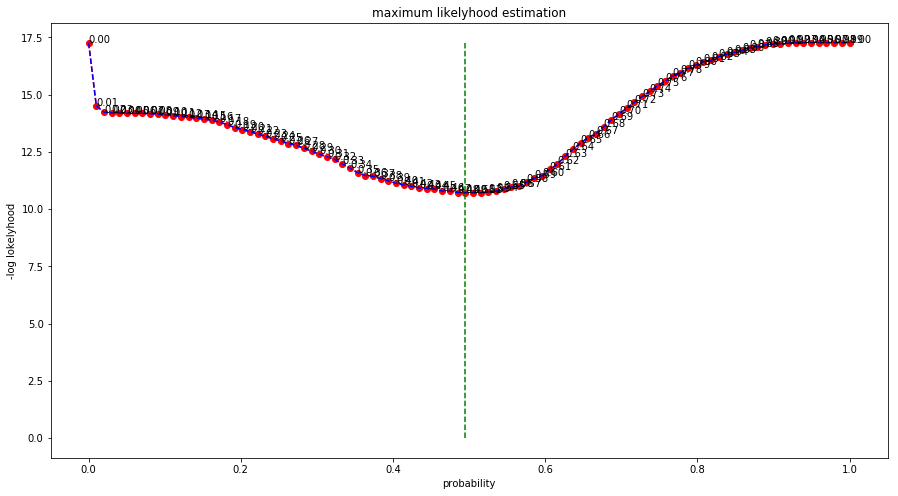

In [240]:
# Visualize
plt.figure(figsize=(15,8))
plt.plot(probabilities,mle,'ro--')
plt.plot(probabilities,mle,'b--')
ind = np.array(mle).argmin()
mx = max(mle)
val = probabilities[ind]

print('Threshold probability value = ',val)
plt.plot([val,val],[0,mx],'g--')

for i,p in enumerate(probabilities):
    plt.text(probabilities[i],mle[i],'%0.2f'%(p))
    
plt.xlabel('probability')
plt.ylabel('-log lokelyhood')
plt.title('maximum likelyhood estimation')

In [241]:
np.min(mle)
index = np.argmin(mle)
probabilities[index]

0.494949494949495

**Part 6: Observation**

*Likelihood Estimation*

- In order to chose values for the parameters of logistic regression, we use maximum likelihood
estimation (MLE).
- As such we are going to have two steps: 
    - (1) write the log-likelihood function
    - (2) find the values of θ that maximize the log-likelihood function.
- The labels that we are predicting are binary, and the output of our logistic regression function is
supposed to be the probability that the label is one. This means that we can (and should) interpret
each label as a Bernoulli random variable: Y ∼ Ber(p) where p = σ(θ
T x).

- MLE is used to finding threshold point of predicted probabilities

- comparing to basic model, this model gives good intercept score for dataset 

# Part-7 : Statistical Evaluation
***

<font color="Green">
    
- Confusion Matrix
- ROC and AUC Curves
- Kappa Score

In [242]:
y_pred_prob_test = model_log.predict_proba(x_test)
y_pred_prob_test_1 = y_pred_prob_test[:,1]

In [243]:
y_pred_prob_test_1

array([0.17228903, 0.35171747, 0.52954062, ..., 0.34962122, 0.71999494,
       0.5825954 ])

In [244]:
pre = threshold()
threh_prob = 0.5050
pre.th = threh_prob
yy = pd.Series(y_pred_prob_test_1)
y_pred_class_test = yy.apply(pre.predict_threshold)

## 7.1 ROC (Receiver Operater Characterstic)
- The ROC curve does this by plotting sensitivity, the probability of predicting a real positive will be a positive, against 1-specificity, the probability of predicting a real negative will be a positive. 

## 7.2 AUC(Area Under the curve)
- AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example.

In [245]:
from sklearn.metrics import roc_curve,auc

In [246]:
y_train.shape,y_pred_prob_test_1

((11700, 1),
 array([0.17228903, 0.35171747, 0.52954062, ..., 0.34962122, 0.71999494,
        0.5825954 ]))

In [275]:
fpr,tpr,proba = roc_curve(y_test,y_pred_prob_test_1)

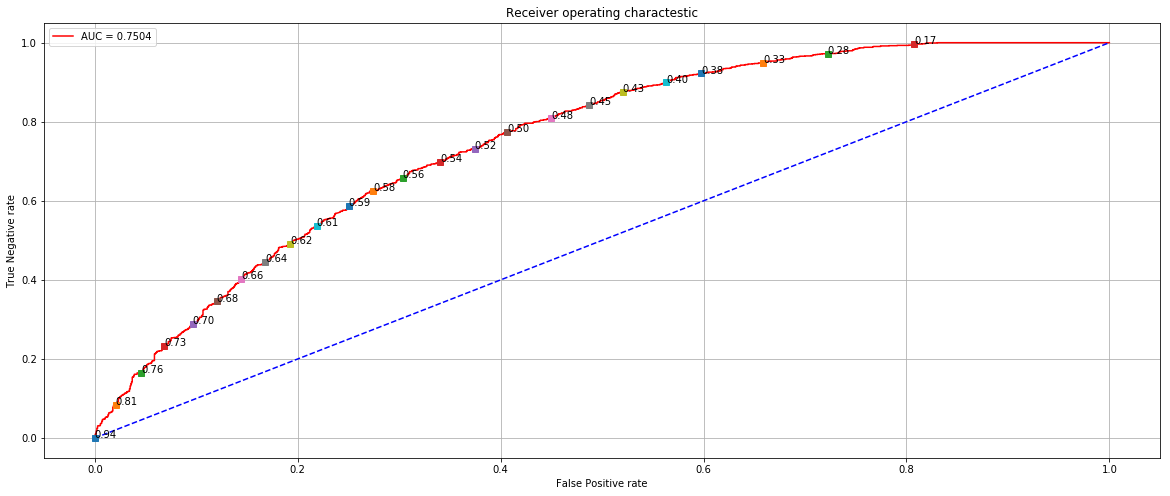

In [276]:
plt.figure(figsize=(20,8))
plt.plot(fpr,tpr,'r-')
plt.plot([0,1],[0,1],'b--')
for i in range(len(proba)):
    if i % 50 ==1:  # display for every 5th value
        plt.plot(fpr[i],tpr[i],'s')
        plt.text(fpr[i],tpr[i],'%0.2f'%proba[i])
        
plt.xlabel("False Positive rate")
plt.ylabel("True Negative rate")
plt.title("Receiver operating charactestic")
area = auc(fpr,tpr)
plt.legend(["AUC = %0.4f"%area])
plt.grid()

## 7.3 Confusion Matrix

In [249]:
from sklearn.metrics import classification_report, confusion_matrix

<h3><b><font color="red">
3.Use the following cost to find optimal cut-off probability to determine if a candidate will join or not </b></h3>
    
- 0.4559 is the optimal cut-off probability of this model. To reason behind this question Incresing Flase positive then it will automatically adjust the True positive.
- so this process is used reducing error for the model.

In [365]:
pre = threshold()
threh_prob = 0.4559 # from ROC
pre.th = threh_prob
yy = pd.Series(y_pred_prob_test_1)
y_pred_class_test = yy.apply(pre.predict_threshold)


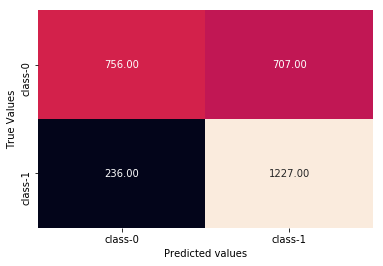

In [366]:
CM = confusion_matrix(y_test,y_pred_class_test)
sns.heatmap(CM,annot=True,fmt='0.2f',xticklabels=['class-0','class-1'],yticklabels=['class-0','class-1'],cbar=False)
plt.xlabel('Predicted values')
plt.ylabel('True Values')
plt.show()

In [367]:
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

In [388]:
FN/FP

0.3338048090523338

- Sensitivity = ( TP / (TP+FN) ) * 100;
- Specificity = ( TN/(TN+FP) ) * 100;
- Accuracy = ( (TP+TN) / (TP+TN+FP+FN) ) * 100;
- Efficiency = ( Sensitivity + Specificity + Accuracy ) / 3; 
- Error rate = (FP + FN) / (TP + TN + FP + FN)
- Precision = TP / (TP + FP)
- Recall = TP / (TP + FN)
- BCR (Balanced Classification Rate) = 1/2* (TP / (TP + FN) + TN / (TN + FP))

Sensitivity measures the proportion of positives that are correctly identified as such.
Also known as True positive rate(TPR).

Specificity measures the proportion of negatives that are correctly identified as such.
Also known as True negative rate(TNR).

Accuracy measures how well the test predicts both TPR and TNR.

In [369]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Accuracy

0.6777170198222829

In [389]:
Recall = TP / (TP + FN)  #TPR
Recall

0.8386876281613124

In [373]:
Specificity = TN / (TN + FP)
Specificity

0.5167464114832536

In [374]:
FP / (FP + TN)  # FPR

0.48325358851674644

In [391]:
TPR = TP / (TP + FN)*100
TNR = TN /(TN + FP)*100
FPR = FP / (FP+TN)
FNR = FN / (FN+TP)

In [393]:
TPR,TNR,FPR,FNR

(83.86876281613124,
 51.674641148325364,
 0.48325358851674644,
 0.16131237183868763)

## 7.4 Classification report

In [377]:
y_pred_class_test.shape

(2926,)

In [378]:
y_pred = model_log.predict(x_test)

In [379]:
cr = classification_report(y_test,y_pred)

In [380]:
print(cr)

              precision    recall  f1-score   support

           0       0.73      0.59      0.65      1463
           1       0.65      0.78      0.71      1463

    accuracy                           0.68      2926
   macro avg       0.69      0.68      0.68      2926
weighted avg       0.69      0.68      0.68      2926



In [381]:
y_test.shape,y_pred.shape

((2926, 1), (2926,))

In [382]:
y_pred = model_log.predict(x_test)

In [383]:
y_pred.shape

(2926,)

In [384]:
y_test.shape

(2926, 1)

In [385]:
kappa = metrics.cohen_kappa_score(y_test,y_pred)
kappa

0.36705399863294597

<font color='balua'>**Part 7:Observations**
    
- Optimal cut-off probability is used to incresing the recall or True positive rate.
- precision and recall of this model is slightly good.
- confusion matrix is FP is 3 time morethen FN.

# <b><font color='red'> Task-2
 

# Part 8: Decision Tree

- <font color="green"> A decision tree is a graph that uses a branching method to illustrate every possible outcome of a decision. ... Programmatically, they can be used to assign monetary/time or other values to possible outcomes so that decisions can be automated.

- A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome.
- The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making.

In [405]:
from sklearn.tree import DecisionTreeClassifier  # classification tree
from sklearn.tree import export_graphviz

In [406]:
model_Dtree =DecisionTreeClassifier(criterion='gini',max_depth=None)

In [407]:
model_Dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [408]:
import pydotplus

In [409]:
export_graphviz(model_Dtree,out_file='credit.odt',feature_names=x_train.columns,filled=True)

In [410]:
graph = pydotplus.graph_from_dot_file('credit.odt')

In [411]:
graph.write_pdf('HR_Dtree.pdf')

True

In [412]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model_Dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.483339 to fit



- Aim of this decision tree identifing the rules or strategies for given observations
- Model building with maximum depth

- In Decision Tree the major challenge is to identification of the attribute for the root node in each level. This process is known as attribute selection. We have two popular attribute selection measures:
     - Information Gain
     - Gini Index
     
**1. Information Gain**
- When we use a node in a decision tree to partition the training instances into smaller subsets the entropy changes. Information gain is a measure of this change in entropy.
- Definition: Suppose S is a set of instances, A is an attribute, Sv is the subset of S with A = v, and Values (A) is the set of all possible values of A, then
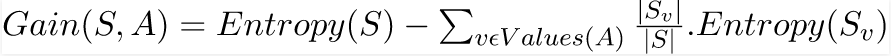

- Entropy

Entropy is the measure of uncertainty of a random variable, it characterizes the impurity of an arbitrary collection of examples. The higher the entropy more the information content.



**2. Gini Index**

- Gini Index is a metric to measure how often a randomly chosen element would be incorrectly identified.
- It means an attribute with lower Gini index should be preferred.
- Sklearn supports “Gini” criteria for Gini Index and by default, it takes “gini” value.
- The Formula for the calculation of the of the Gini Index is given below.
- Gini Index = $1 - sum(p_i^2)$

## Parameter Pruning

**GridsearchCV algorith is used to identifying or decreasing depth of tree**

- Models can have many hyperparameters and finding the best combination of parameters can be treated as a search problem.
- In general, model parameters are optimized according to some loss function, while hyperparameters are instead searched for by exploring various settings to see which values provided the highest level of accuracy.

In [413]:
from sklearn.model_selection import GridSearchCV # grid search is cross validation
# hyperparameters tuning

In [414]:
model_tune = DecisionTreeClassifier()

In [415]:
tuned_parameter = [{'criterion':['gini','entropy'],
                   'max_depth':range(2,10)}]

In [416]:
clf = GridSearchCV(model_tune,param_grid=tuned_parameter,cv=10,scoring='roc_auc')
clf.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             pre_dis

In [417]:
clf.best_score_

0.9092683176272919

In [418]:
clf.param_grid

[{'criterion': ['gini', 'entropy'], 'max_depth': range(2, 10)}]

In [419]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 9}

In [420]:
model =DecisionTreeClassifier(criterion='gini',max_depth=3)

In [421]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [422]:
export_graphviz(model,out_file='HR.odt',feature_names=x_train.columns,filled=True)
graph = pydotplus.graph_from_dot_file('HR.odt')
graph.write_pdf('HR_Tuned_Tree.pdf')

True

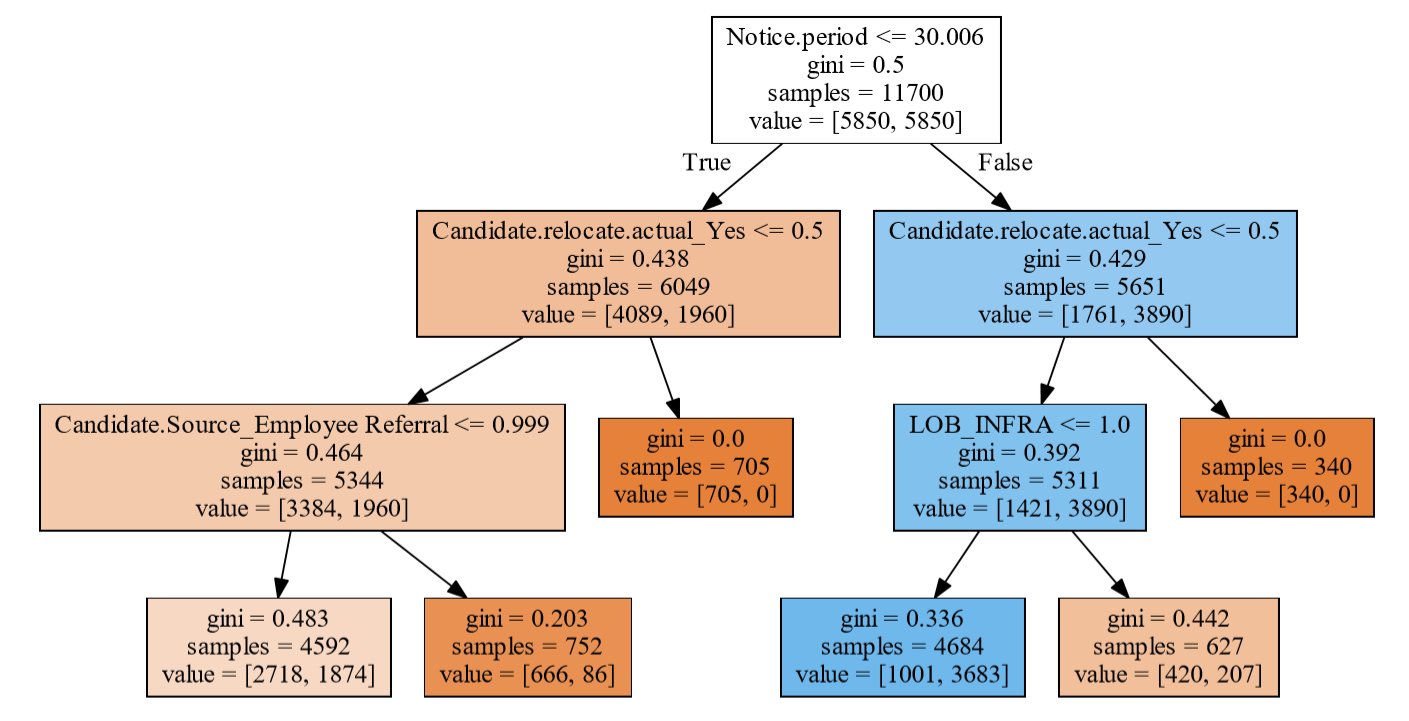

**Decision Tree Strategies**

- **Notice Period** is root node of this analysis of probability of joining or Not joined
- **Candidate relocate** is the child node of root node.
- **Candidate.Source_referal and LOB_infra** are the subnodes nodes of child nodes


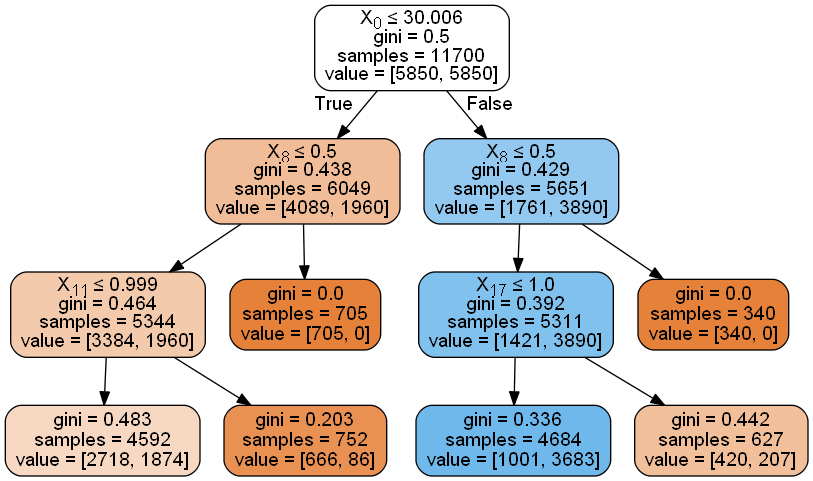

In [423]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [424]:
y_pred = model_Dtree.predict(x_test)

In [425]:
y_pred_prob = model_Dtree.predict_proba(x_test)

In [426]:
from sklearn import metrics

In [427]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8270676691729323


In [428]:
kappa = metrics.cohen_kappa_score(y_test,y_pred)
kappa

0.6541353383458647

In [429]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1223  240]
 [ 266 1197]]


In [430]:
y_pred_prob_test_1 = y_pred_prob[:,1]

In [431]:
y_pred = model.predict(x_test)

In [432]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.70      0.82      0.75      1463
           1       0.78      0.65      0.71      1463

    accuracy                           0.73      2926
   macro avg       0.74      0.73      0.73      2926
weighted avg       0.74      0.73      0.73      2926



<font color ='balue'> **Part 8: Observetions**
 
- After building Decision tree increasing model accuracy and precision, recall
- Giving the rules for identifying highest information gain and selecting most usefull features for us.
- Pruning operation is process of identifying important features and decreasing depth of the tree

## Conclusions

-  We've gone through the inner working of the logistic regression model,ROC AUC curves and Decicsion tree as a result I hope that you have a better understanding of them.
- For competitions, logistic regression will certainly not perform as well as other models.
- The ROC curve is not only useful for logistic regression results. In fact we can use the ROC curve and the AUC to assess the performance of any binary classifier.
- Decision Tree algorithm is finding the optimal feature and rules to predict the operations